In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# Author: Selvaria
# pandas一些实用功能的整理，也有一些作图方面的

import pandas

In [3]:
#示例1

import pymysql
import matplotlib.pyplot as plt

connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT factory, type,date,price FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
WHERE source_id = '3' AND k.`name` = '柴油' and price > 100 and date > '2018-04-01' order by date desc"

df = pandas.read_sql(sql, connection)
df.head(10)

,factory,type,date,price
0,辽阳石化,0#国六,2019-11-27,6355.0
1,辽阳石化,-10#国六,2019-11-27,6739.0
2,辽阳石化,-35#国六,2019-11-27,7313.0
3,大庆石化,-35#国六,2019-11-27,7256.0
4,大连石化,0#国六,2019-11-27,6695.0
5,大连石化,-10#国六,2019-11-27,7097.0
6,大连石化,-35#国六,2019-11-27,7700.0
7,大连西太,0#国六,2019-11-27,6890.0
8,大连西太,-10#国六,2019-11-27,7304.0
9,大连西太,-35#国六,2019-11-27,7924.0


In [5]:
#查看某列（重复）值出现次数
value_count_df = df['factory'].value_counts()
value_count_df.head()

中石化               7168
中石油               7131
京博石化              2052
山东恒源石油化工集团有限公司    1831
尚能                1684
Name: factory, dtype: int64

In [6]:
#筛选并选取列值等于特定名称的行
df_count = df[(df.factory=='大港石化')|(df.factory=='抚顺石化')|(df.factory=='京博石化')|(df.factory=='大连西太')\
                |(df.factory=='尚能')|(df.factory=='金诚石化')|(df.factory=='锦州炼厂')]
df_count.head()

,factory,type,date,price
7,大连西太,0#国六,2019-11-27,6890.0
8,大连西太,-10#国六,2019-11-27,7304.0
9,大连西太,-35#国六,2019-11-27,7924.0
117,锦州炼厂,0#国六,2019-11-27,6355.0
118,锦州炼厂,-10#国六,2019-11-27,6739.0


In [8]:
#按照指定列名归纳数据，取其他值的平均值（mean），groupby后会将列变为index类型
#reset_index()是为了能将groupby后的列恢复成可取值的列
df_0g6 = df_count[(df_count.type=='0#国六')].groupby(by=['factory', 'date'], axis=0).agg('mean').reset_index()
df_0g6

,factory,date,price
0,京博石化,2018-05-31,6518.0
1,京博石化,2018-06-01,6545.0
2,京博石化,2018-06-02,6545.0
3,京博石化,2018-06-03,6545.0
4,京博石化,2018-06-04,6545.0
5,京博石化,2018-06-05,6545.0
6,京博石化,2018-06-06,6545.0
7,京博石化,2018-06-07,6545.0
8,京博石化,2018-06-08,6536.0
9,京博石化,2018-06-09,6563.0


In [ ]:
#pandas的时间相关操作
#pandas的对时间格式转化为字符操作，以上个cell为例：新建一列，应该也可以在原来的列上操作
df1['monthday'] = df1['date'].apply(lambda x:x.strftime('%m-%d'))
#再将字符转为整形，其实在上一步可以将字符类型设为%m%d就更方便了
df1['intday'] = df1['monthday'].apply(lambda x:int(x.translate(str.maketrans('', '', '-'))))
# 字符到时间操作：
df1['time'] = pandas.to_datetime(df1['time'])

In [ ]:
#链式替换

for index in df.index:
    df.loc[index, '日期'] = df.loc[index, '日期'].replace('年','-').replace('月','-').replace('日','')

In [6]:
#numpy条件筛选
import numpy as np
l = np.array([1,2,3,4])
#np.where(condition, x, y) #满足条件(condition)，输出x，不满足输出y。
#np.where(condition) #只有条件 (condition)，没有x和y，则输出找到n维数组中特定数值的索引
np.where(l>2)[0] #注意要加0以便选取出供之后使用

array([2, 3], dtype=int64)

In [ ]:
#loc和iloc区别
print(filtered_sub_df_binary.loc[4,'ImageId']) #按index取值
print(filtered_sub_df_binary['ImageId'].iloc[4])#按行号取值

In [ ]:
#dataframe转换成向量array格式
df_array = df.values
df_array

In [ ]:
#dataframe删除行df
df.drop(df.index[[16,17]],axis=0,inplace=True) #此时原数据结构改变，inplace=False时，原数据不改变，需赋值到新数据
#dataframe删除列
df.drop(['B','C'],axis=1,inplace=True) #axis=1（按列方向操作）、inplace=True（修改完数据，在原数据上保存）

In [ ]:
#构造dataframe方法,按行
import pandas as pd
ds2 = [[1,2],[3,4],[5,6]]
df2 = pd.DataFrame(ds2,columns=['a','b'])

#构造dataframe方法,按列
df = pd.DataFrame({'A':['A0', 'A1', 'A2', 'A3'],
                   'B':['B0', 'B1', 'B2', 'B3'],
                   'C':['C0', 'C1', 'C2', 'C3'],
                   'D':['D0', 'D1', 'D2', 'D3']}, index=list('0123'))

In [ ]:
#pandas去重复行

newdata = data.drop_duplicates(subset=['标题','链接'],keep='last') #注意要重新赋值，否则不会在原data上做出改变
#当keep=False时，就是去掉所有的重复行
#当keep=‘first'时，就是保留第一次出现的重复行
#当keep='last'时就是保留最后一次出现的重复行。（注意，这里的参数是字符串）
newdata2 = data.drop_duplicates(subset=['标题'],keep='last') #此时只要标题列一样就算重复

In [ ]:
#pandas升/降序方法
df_count.sort_values('dbscan_code',ascending= False) #ascending表示排序方法，True表示升序，False表示降序

In [ ]:
#pandas不使用.loc方法取值
dataframe[b][dataframe[a]==1].values[0] #在一行中a列等于1时b列的值

In [ ]:
#dataframe返回index值
a = df[df['q_id']=='2abdc94b3d8f15aa7ed4faae599f87a8'].index.tolist()[0]

In [ ]:
#dataframe打乱随机重新排列行

df_shuffle = df_need.sample(frac=1).reset_index(drop=True) #后半部分是对打乱后的index进行重排

In [ ]:
#pandas 新增(空)列
pandas.concat([df, pandas.DataFrame(columns=['92_p','95_p','0_p'])]) #随机位置
#或：
df['D'] = None #最后增加单列

In [ ]:
#dataframe选取多个特定index的值（非连续的index行）
df_s = df.loc[[0,2]]

In [ ]:
#pandas按条件新建（替换）表格值方法
df_com = df_com[df_com['name'].str.contains('石化&石油')] #含有某字符的串筛选
df_v = df_com[~df_com['name'].str.contains('石化|石油|能源')]#去掉某字符串的筛选
df_up['single_sum'] = df_up['Sl'] * df_up['Dj'] #计算两列的运算赋值到新列

In [ ]:
# nan值处理相关

#判断某个单元格是否为nan
import numpy as np

p = df.loc[0,'phone']
np.isnan(p) #返回True则为nan

#将有nan值的列做判断并单独新加一列并取反，因为有空值的时候返回为true，取反为false
#注意这里是pandas的特殊取反，其他python里不一样
train_df['新列名'] = ~train_df['有空值的列名'].isna() #~是取反符号，在其他情况下二进制专用，对于十进制数等于-x-1
train_df.head()

#直接替换
df['EncodedPixels'].fillna('',inplace=True) #注意inplace要设置成true才能替换

#单独选择有空列的值，其中close_val_yesd是列名，如果列名写成value，则会选择所有有空值的列，会有重复行
df_p[df_p.isnull().close_val_yesd==True]
df[df['close_val_yesd'].notnull()] #这是选取close_val_yesd列值非空时所有行

In [ ]:
#pandas左右合并操作
df_result = pandas.merge(df_left, df_right, how='left', on='date') #how参数默认是inner，即inner join，on参数是公共列，必须列名一致

In [ ]:
#pandas上下合并操作
import pandas as pd

df = pd.DataFrame({'A':['A0', 'A1', 'A2', 'A3'],
                   'B':['B0', 'B1', 'B2', 'B3'],
                   'C':['C0', 'C1', 'C2', 'C3'],
                   'D':['D0', 'D1', 'D2', 'D3']})

df2 = df.append(df, ignore_index=True) #自动续index
df3 = df2.append(df, ignore_index=True)
df3

In [ ]:
#pandas将两个df存到同个excel的两个sheet里
writer=pandas.ExcelWriter('E:/20180927.xls')
df_up = pandas.read_sql(sql_up,connection)
df_down = pandas.read_sql(sql_down,connection)
df_up.to_excel(writer, sheet_name='Sheet1') 
df_down.to_excel(writer, sheet_name='Sheet2')
writer.save() #注意这行不能省

<IPython.core.display.Javascript object>


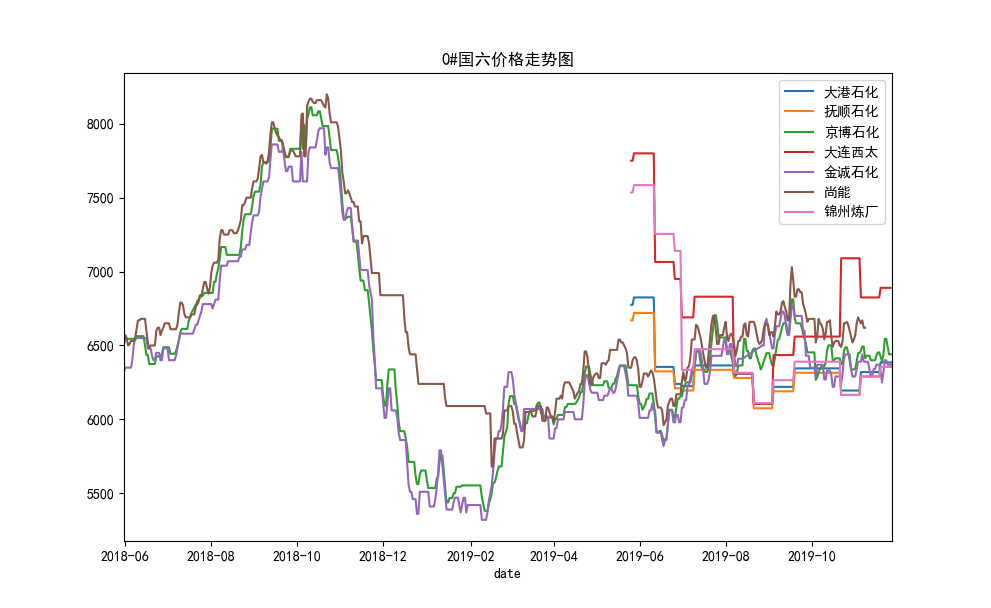

In [9]:
#画图部分
#多个折线图画在一起
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

#如果要画在同一张图上，要设定轴关联（ax）
ax = df_0g6[df_0g6['factory'].str.contains('大港石化')].plot(x='date', y='price', label='大港石化', title='0#国六价格走势图')
df_0g6[df_0g6['factory'].str.contains('抚顺石化')].plot(x='date', y='price', label='抚顺石化', ax=ax)
df_0g6[df_0g6['factory'].str.contains('京博石化')].plot(x='date', y='price', label='京博石化', ax=ax)
df_0g6[df_0g6['factory'].str.contains('大连西太')].plot(x='date', y='price', label='大连西太', ax=ax)
df_0g6[df_0g6['factory'].str.contains('金诚石化')].plot(x='date', y='price', label='金诚石化', ax=ax)
df_0g6[df_0g6['factory'].str.contains('尚能')].plot(x='date', y='price', label='尚能', ax=ax)
df_0g6[df_0g6['factory'].str.contains('锦州炼厂')].plot(x='date', y='price', label='锦州炼厂', ax=ax)

In [2]:
# pandas 按列合并

import pymysql
import matplotlib.pyplot as plt
import pandas

connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql_2018 = "SELECT exchange_date,exchange_good,sum(Je) FROM financial_exchange \
WHERE Je > 100 and exchange_good != '*住宿服务*住宿费' and exchange_date >= '2018-01-01' and exchange_date < '2019-01-01' \
group by exchange_date order by exchange_date"
df_2018 = pandas.read_sql(sql_2018, connection)

sql_2019 = "SELECT exchange_date,exchange_good,sum(Je) FROM financial_exchange \
WHERE Je > 100 and exchange_good != '*住宿服务*住宿费' and exchange_date >= '2019-01-01' group by exchange_date order by exchange_date"
df_2019 = pandas.read_sql(sql_2019, connection)

def handle_df_sum(df1,df2):
    df1['monthday'] = df1['exchange_date'].apply(lambda x:x.strftime('%m'))
    df2['monthday'] = df2['exchange_date'].apply(lambda x:x.strftime('%m'))
#     df3['monthday'] = df3['exchange_date'].apply(lambda x:x.strftime('%m-%d'))
    
    df_middle = pandas.merge(df1, df2, how='outer', on='monthday')
#     result = pandas.merge(df_middle, df3, how='outer', on='monthday')
    
    df_middle['intday'] = df_middle['monthday'].apply(lambda x:int(x.translate(str.maketrans('', '', '-'))))
    result = df_middle.sort_values('intday', ascending=True)
    r0 = result[['sum(Je)_x','sum(Je)_y','intday']]
    r = r0.groupby(by='intday', axis=0).agg('sum').reset_index()
    return r

r0 = handle_df_sum(df_2018,df_2019)
# r0.head()
r = r0.groupby(by='intday', axis=0).agg('sum').reset_index()
r['sum(Je)_x'] = r['sum(Je)_x']/10000000000
r['sum(Je)_y'] = r['sum(Je)_y']/10000000000
r.fillna(0,inplace=True)
r

,intday,sum(Je)_x,sum(Je)_y
0,1,75.795795,75.427059
1,2,61.999921,34.912311
2,3,52.440181,103.466600
3,4,49.372928,30.305937
4,5,40.093598,80.989737
5,6,41.077592,79.773885
6,7,30.120816,70.637522
7,8,56.699486,74.639883
8,9,63.517180,87.974944
9,10,56.322888,61.357551


<IPython.core.display.Javascript object>


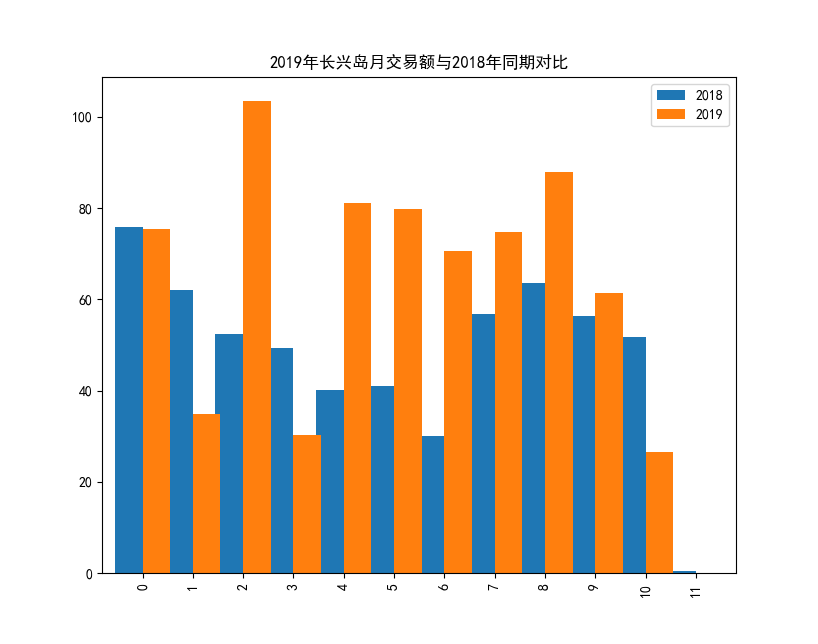

In [4]:
# 如果要画并列柱状图的画，建议在plot函数里不设定y值，然后将要使用的数据（y）单独拿到一个df里，然后直接画图，只在plot函数里设定x轴取值
# 然后通过调整柱体宽度区分x轴各个节点

%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

r.columns = ['月份','2018','2019']
# r.plot(kind='bar', x=[str(i) for i in range(1,13)], title='2019年月交易额与2018年同期对比')
rbar = r[['2018','2019']]
ax = rbar.plot(kind='bar', width=1.1, title='2019年长兴岛月交易额与2018年同期对比')

<IPython.core.display.Javascript object>


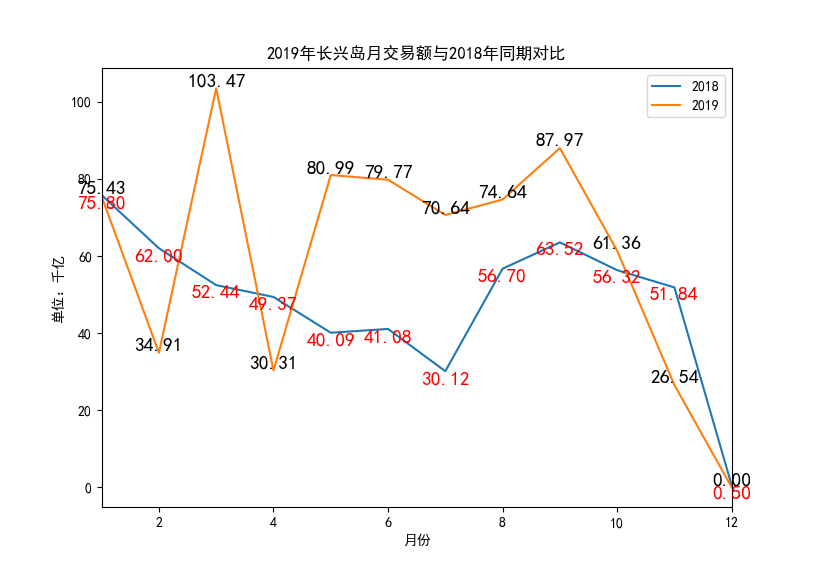

In [5]:
# 折线图标记数值

ax = r.plot(kind='line',x='月份',y='2018',label='2018', title='2019年长兴岛月交易额与2018年同期对比')
r.plot(kind='line',x='月份',y='2019',label='2019', ax=ax)
plt.ylabel('单位：千亿')
for a, b in zip(r['月份'],r['2019']):
    ax.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=14)
for a, b in zip(r['月份'],r['2018']):
    ax.text(a, b, '%.2f' % b, ha='center', va='top', fontsize=14, color='red')

<IPython.core.display.Javascript object>


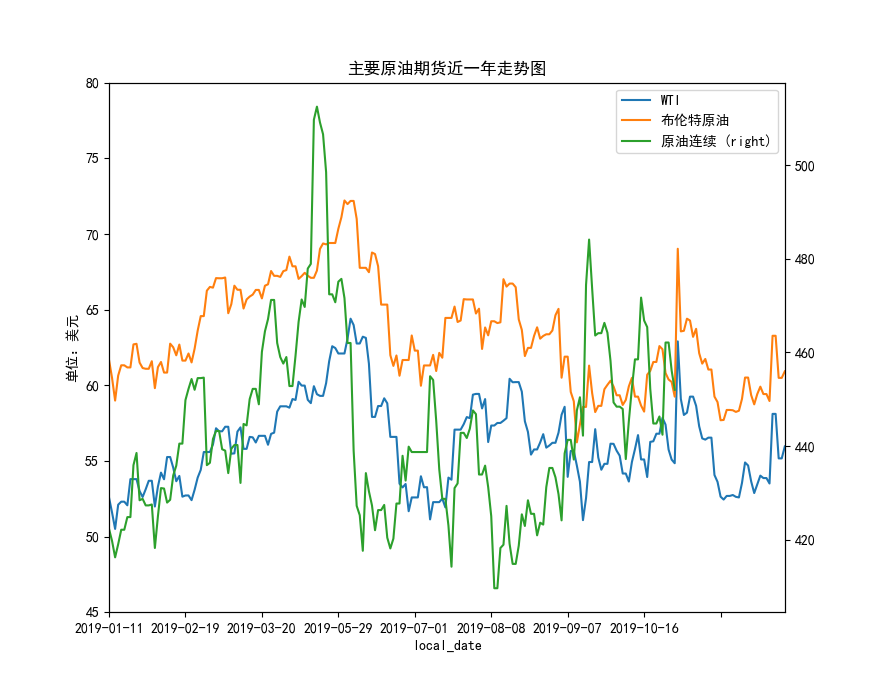

In [7]:
# 双y轴示例
# 设置y轴阈值，标签

import pymysql
import pandas
import matplotlib.pyplot as plt

%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "select name, local_date, yes_settlement from yjt_futures_day where local_date > '2018-01-01'and \
yes_settlement > 10"

df_futrues = pandas.read_sql(sql, connection)

for index in df_futrues.index:
    if '原油1' in df_futrues.loc[index, 'name']:
        df_futrues.loc[index, 'name'] = '原油连续'
    else:
        continue
        
df_g = df_futrues.groupby(by=['name', 'local_date'], axis=0).agg('mean').reset_index()

ax = df_g[df_g['name']=='WTI'].plot(x='local_date', y='yes_settlement', ylim=[45,80], label='WTI', title='主要原油期货近一年走势图')
plt.ylabel('单位：美元')
df_g[df_g['name']=='布伦特原油'].plot(x='local_date', y='yes_settlement', label='布伦特原油', ax=ax)
df_g[df_g['name']=='原油连续'].plot(x='local_date', y='yes_settlement', secondary_y=True, label='原油连续', ax=ax)

In [ ]:
#plt画图保存
for i in list_a:
    plt.figure(i) #这一步是创建图片，否则后面的会覆盖先前的
    sns_pic = seaborn.barplot(x = '油品名',y = i, data = oil_title_df)
    fig = sns_pic.get_figure()
    fig.savefig('E:/data/data_picture/hist{}.png'.format(i)) #保存文件

In [13]:
#实例2

train_df = pandas.read_csv(r'D:\data\Kaggle\Severstal/train.csv')
train_df.head()

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


In [14]:
#将ImageId_ClassId分出一列，使用该列值的_号前面的值
train_df['ImageId'] = train_df['ImageId_ClassId'].apply(lambda x: x.split('_')[0]) 
#train_df['ClassId'] = train_df['ImageId_ClassId'].apply(lambda x: x.split('_')[1])
#新建一列'Missing_defect'，如果'EncodedPixels'列值为空，则该列值为True
train_df['Missing_defect'] = train_df['EncodedPixels'].isnull()
train_df.head()

,ImageId_ClassId,EncodedPixels,ImageId,Missing_defect
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,False
1,0002cc93b.jpg_2,NaN,0002cc93b.jpg,True
2,0002cc93b.jpg_3,NaN,0002cc93b.jpg,True
3,0002cc93b.jpg_4,NaN,0002cc93b.jpg,True
4,00031f466.jpg_1,NaN,00031f466.jpg,True


In [15]:
# 整合'ImageId'列，统计'Missing_defect'列的和（sum）
train_nan_df = train_df.groupby(by='ImageId', axis=0).agg('sum').reset_index(inplace=False) #如果为True则是在原train_df上修改，不会赋值
train_nan_df.head()

,ImageId,Missing_defect
0,0002cc93b.jpg,3.0
1,00031f466.jpg,4.0
2,000418bfc.jpg,4.0
3,000789191.jpg,4.0
4,0007a71bf.jpg,3.0


In [18]:
# 再次新建列，使用类似条件判断的方式，如果没有后边的astype(int)方法，则返回布尔值
train_nan_df['allMissing'] = (train_nan_df['Missing_defect'] == 4).astype(int) #如果Missing_defect=4，allMissing列值等于1
train_nan_df.head()

,ImageId,Missing_defect,allMissing
0,0002cc93b.jpg,3.0,0
1,00031f466.jpg,4.0,1
2,000418bfc.jpg,4.0,1
3,000789191.jpg,4.0,1
4,0007a71bf.jpg,3.0,0
